# Fourier Series Calculator

## Function Definition

The function definition will define all the functions needed to calculate our Fourier series. As of right now, we have functions to calculate the ${a_0}$ and ${\alpha_n}$ and ${\beta_n}$ of functions. Let ${L = P/2}$ where P is the period.

* The function definitions are as follows:

    * ${a_0 = \frac{1}{L}\int_{0}^{2L} f(t)  dt}$

    * ${\alpha_n = \frac{1}{L}\int_{0}^{2L} f(t)cos(\frac{n\pi }{L}t)  dt}$

    * ${\beta_n = \frac{1}{L}\int_{0}^{2L} f(t)cos(\frac{n\pi }{L}t)  dt}$

In [2]:
from sympy import *
import numpy as np

import matplotlib.pyplot as plt

t = symbols('t', real=True)
n = symbols('n', real=True, integer=True)

def L2_integrate(function, basis, a, b):
    f = function * conjugate(basis)
    integral = integrate(f, (t, a, b))
    
    return integral


def azero(function, L, lB, uB):
    f = function
    integral = (L2_integrate(function, 1, lB, uB)/L).simplify()

    integral = integral.simplify()
    return integral


def an(function, L, lB, uB):
    f = function
    basis = cos(n*pi*t/L)
    integral = (L2_integrate(f, basis, lB, uB)/L).simplify()

    integral = integral.simplify()
    return integral


def bn(function, L, lB, uB):
    f = function
    basis = sin(n*pi*t/L)
    integral = (L2_integrate(f, basis, lB, uB)/L).simplify()

    integral = integral.simplify()
    return integral



# Defining our original Fourier Series function (piecewise, continuous)

### Piecewise

In [24]:
P = int(2)
L = int(P / 2)

f = Piecewise(
    (t, t < 1),   # t is zero before time pi
    (2-t, t < 2),      # otherwise, t is 1
)

Eq(symbols('f'), f)

Eq(f, Piecewise((t, t < 1), (2 - t, t < 2)))

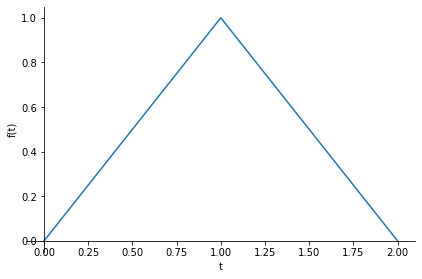

In [25]:
plot(f, (t, 0, 2*L))

### Continuous

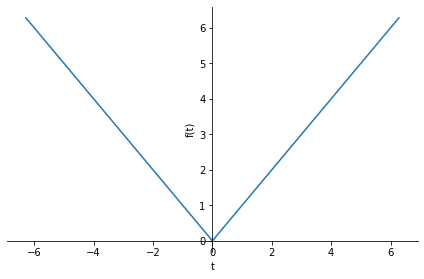

In [82]:
L = 2*pi
f = abs(t)

plot(f, (t, -L, L))

# Using $\{\cos(n \pi t/L), \sin(n \pi t/L\}$ as basis

We will be using both the ${cos(\frac{n\pi }{L}t)}$ and ${sin(\frac{n\pi }{L}t)}$ functions as our bases and we will integrate from them.

In [12]:
a_n = an(f, L, 0, 2*L)

Eq(symbols('a_n'), a_n)

Eq(a_n, Piecewise((2*((-1)**n - 1)/(pi**2*n**2), Ne(n, 0)), (1, True)))

In [13]:
b_n = bn(f, L, 0, 2*L)

Eq(symbols('b_n'), b_n)

Eq(b_n, 0)

In [14]:
a_0 = azero(f, L, 0, 2*L)

Eq(symbols('a_0'), a_0)

Eq(a_0, 1)

In [16]:
num = 10

approx = a_0/2

cosine = cos(n*pi*t/L)
sine = sin(n*pi*t/L)

for num_i in range (1, num+1):
    approx += (a_n*cosine + b_n*sine).subs(n, num_i)

approx


-4*cos(pi*t)/pi**2 - 4*cos(3*pi*t)/(9*pi**2) - 4*cos(5*pi*t)/(25*pi**2) - 4*cos(7*pi*t)/(49*pi**2) - 4*cos(9*pi*t)/(81*pi**2) + 1/2

# Final Results (Plot, Power Spectrum)

## Plot

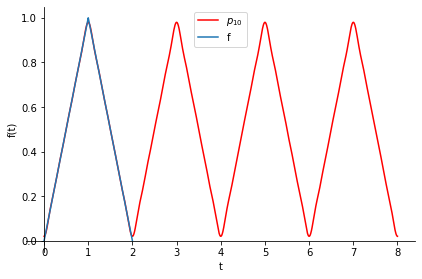

In [17]:
fig = plot(approx, f, (t, 0, 4*P), legend=True, show=False)
fig[0].line_color='r'
fig[0].label = '${' + 'p_{' + str(num) + '}}$'
fig[1].label = 'f'
fig.show()

## Power Spectrum

* TO-DO